# **Introduction**

I am a beginner in data science. And it is my first notebook. So any feedback and suggestion is welcome.

**Importing libraries**

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm 
import random
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC


**Importing dataset**

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# **Data Analysis & Data Preparation**

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Filling the nan values**

***Age***

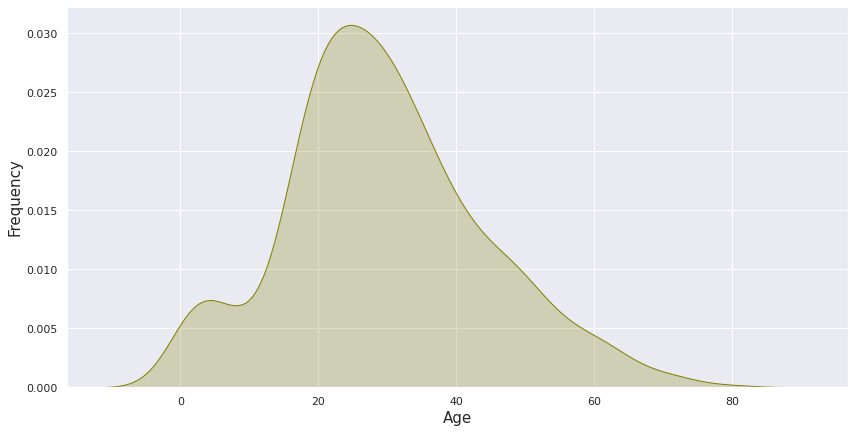

In [8]:
sns.set_theme()
plt.figure(figsize=(14,7))
x = train_df['Age']
sns.kdeplot(train_df['Age'], shade=True, color="olive")
plt.xlabel('Age',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.show()

filling the nan values of the "Age" column by creating a list of numbers which follows similar distribution like "Age" column. Don't know if it is a right way or not.

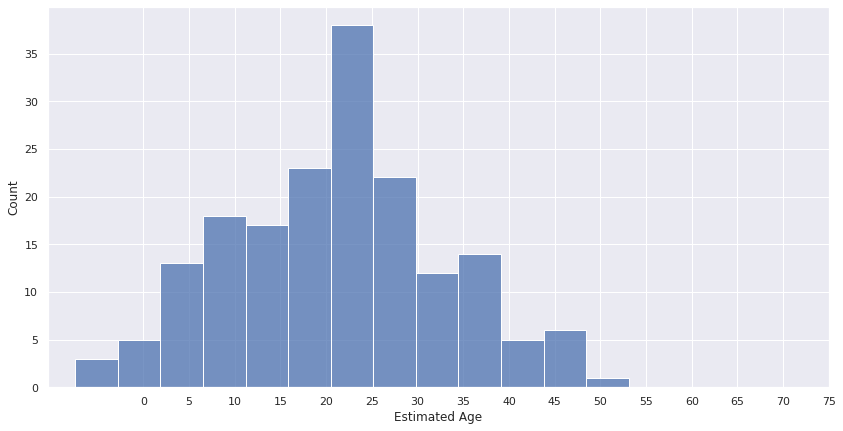

In [9]:
plt.figure(figsize=(14,7))
np.random.seed(24)
x = np.linspace(train_df['Age'].min(),train_df['Age'].max(),16)
mean = train_df['Age'].mean()
std = np.std(train_df['Age'])
train_age = np.around(skewnorm.rvs(-1,mean,std,177),2)
sns.histplot(train_age)
plt.xticks(np.arange(0, 80, 5))
plt.xlabel('Estimated Age')
plt.show()

In [10]:
random.seed(50)
train_age = train_age.tolist()
for i in range(len(train_age)):
    if train_age[i] <=0:
        train_age[i] = random.randint(50,80)     

In [11]:
tr = train_df['Age'].copy()
tr[np.isnan(tr)]= train_age
train_df['Age'] = tr
train_df['Age'].isnull().sum()

0

In [12]:
np.random.seed(24)
mean = test_df['Age'].mean()
std = np.std(test_df['Age'])
null_numb = test_df['Age'].isnull().sum()
test_age = np.around(skewnorm.rvs(-1,mean,std,null_numb),2)

In [13]:
random.seed(50)
test_age = test_age.tolist()
for i in range(len(test_age)):
    if test_age[i] <=0:
        test_age[i] = random.randint(50,80)     

In [14]:
te = test_df['Age'].copy()
te[np.isnan(te)]= test_age
test_df['Age'] = te
test_df['Age'].isnull().sum()

0

***Fare***

filling nan value of the 'Fare' column of test_df.

In [15]:
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

***Embarked***

In [16]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

**Deceased vs Survived**

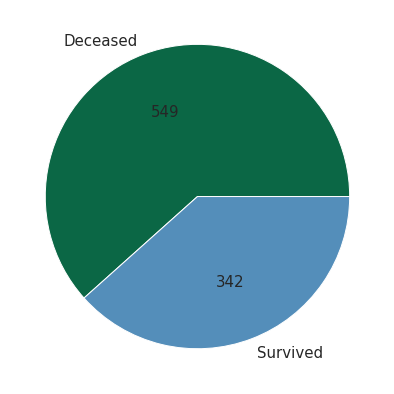

In [18]:
plt.figure(figsize=(7,7))
x = train_df['Survived'].value_counts()
labels = ['Deceased','Survived']
colors = ['#0b6745','#548eba']
total = len(train_df['Survived'])
plt.pie(x,labels = labels,colors = colors,autopct=lambda p: '{:.0f}'.format(p * total / 100)
        ,textprops = {'fontsize' :15})
plt.show()

In [19]:
data = [train_df,test_df]
for dataset in data:
    edges = np.linspace(train_df['Age'].min(),train_df['Age'].max(),6).astype(int)
    dataset['Age_range'] = pd.cut(dataset['Age'],edges)

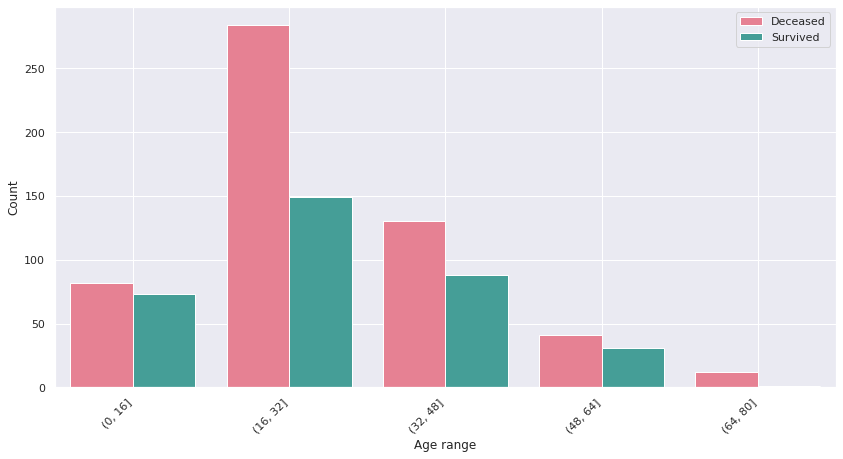

In [20]:
plt.figure(figsize=(14,7))
sns.countplot(x = 'Age_range', data = train_df, hue = 'Survived', palette="husl")
plt.xlabel('Age range',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.legend(['Deceased','Survived'], loc = 'upper right')
plt.grid(True)
plt.show()

**Age and Sex**

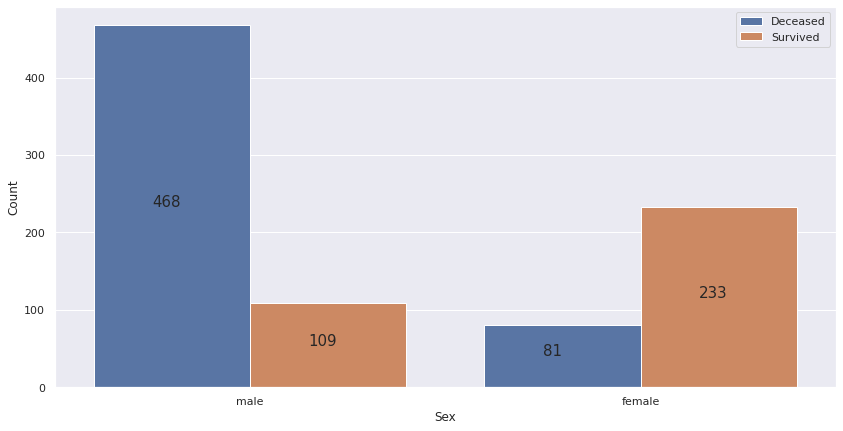

In [21]:
plt.figure(figsize=(14,7))
ax = sns.countplot(x = 'Sex', data = train_df, hue = 'Survived')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()/2),fontsize = 15)
plt.xlabel('Sex',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
plt.legend(['Deceased','Survived'], loc = 'upper right')
plt.show()

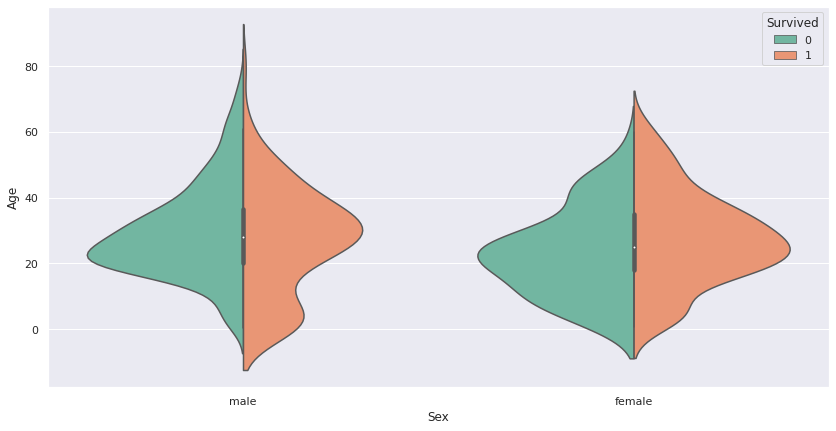

In [22]:
plt.figure(figsize=(14,7))
sns.violinplot(x ="Sex", y ='Age', hue ="Survived",
data = train_df,palette="Set2", split = True)
plt.show()

**Pclass**

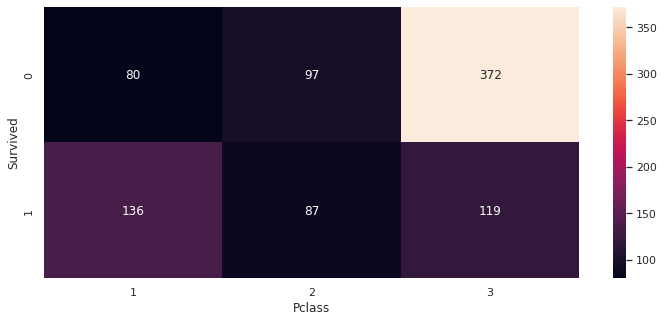

In [23]:
plt.figure(figsize=(12,5))
group = train_df.groupby(["Survived",'Pclass'])
pclass_srv = group.size().unstack() 
sns.heatmap(pclass_srv,annot = True,fmt = 'd')
plt.show()

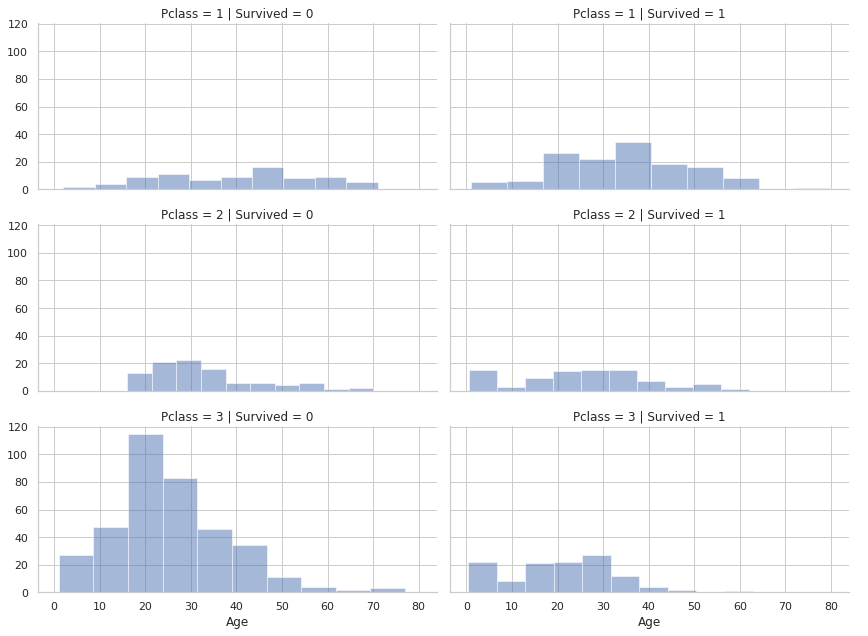

In [24]:
sns.set(style="whitegrid")
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=3, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5,fill=True)
grid.add_legend()

**'SibSp' & 'Parch'**

In [25]:
train_df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [26]:
train_df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [27]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    
train_df['relatives'].unique()    

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

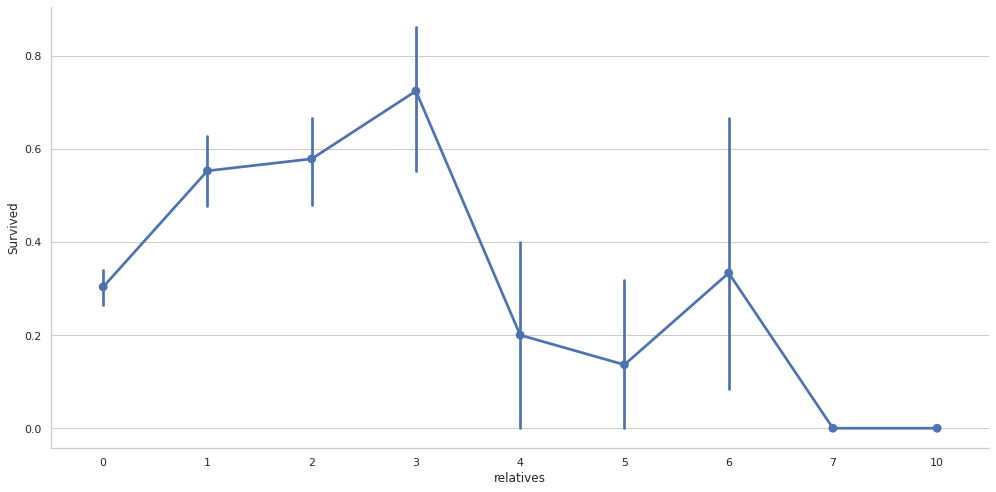

In [28]:
g = sns.catplot(x="relatives",y="Survived",
               data=train_df, kind="point",height=7, aspect=2)

In [29]:
data = [train_df,test_df]
for dataset in data:
    dataset.loc[dataset['relatives']==0,'Alone']= 0
    dataset.loc[dataset['relatives']>0,'Alone']= 1
    dataset['Alone'] = dataset['Alone'].astype(int)
train_df['Alone'].describe()   

count    891.000000
mean       0.397306
std        0.489615
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Alone, dtype: float64

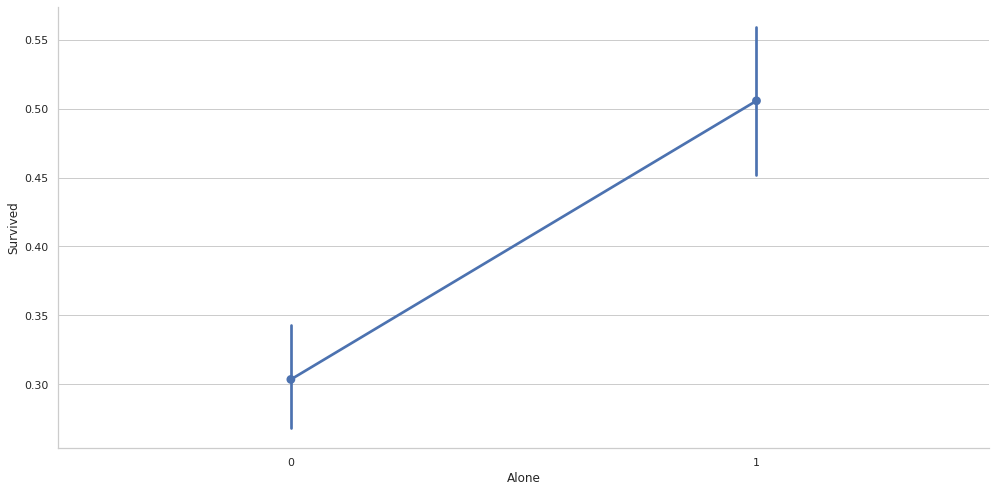

In [30]:
a = sns.catplot(x="Alone",y="Survived",
               data=train_df, kind="point",height=7, aspect=2)

In [31]:
family_map = {0: 'Alone', 1: 'Small', 2: 'Small', 3: 'Small', 4: 'Medium', 5: 'Medium', 6: 'Medium', 7: 'Large', 10: 'Large'}
data = [train_df,test_df]
for dataset in data:
    dataset['Family_size'] = dataset['relatives'].map(family_map)

<AxesSubplot:xlabel='Family_size', ylabel='count'>

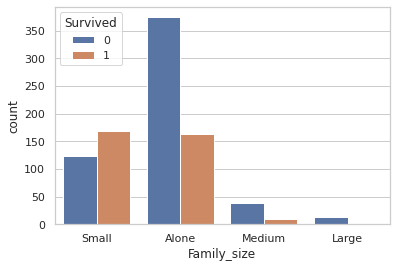

In [32]:
sns.countplot(x='Family_size', hue='Survived', data=train_df)

**Fare**

In [33]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [34]:
len(train_df['Fare'].unique())

248

In [35]:
edg = pd.qcut(train_df['Fare'],5).unique()
edg

[(-0.001, 7.854], (39.688, 512.329], (7.854, 10.5], (10.5, 21.679], (21.679, 39.688]]
Categories (5, interval[float64, right]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

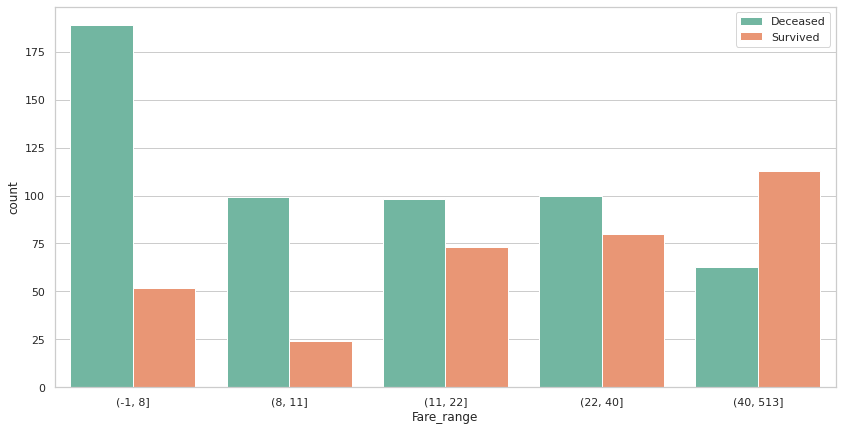

In [36]:
plt.figure(figsize=(14,7))
data = [train_df,test_df]
for dataset in data:
    edges = [-1,8,11,22,40,513]
    dataset['Fare_range'] = pd.cut(dataset['Fare'],edges)
sns.countplot(x = 'Fare_range',data = train_df, hue = 'Survived',palette = 'Set2')
plt.legend(['Deceased','Survived'], loc = 'upper right')

plt.show()

**Embarked vs Survived**

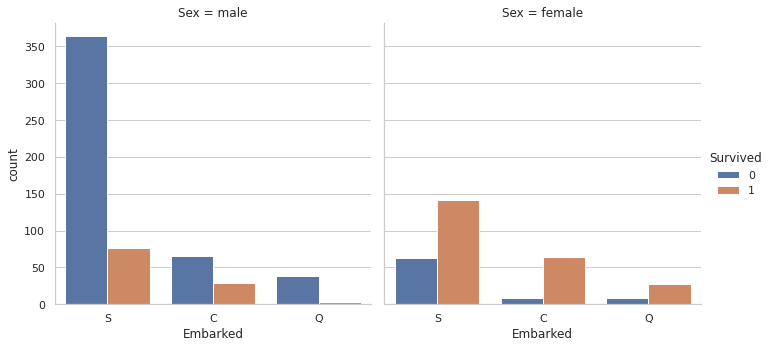

In [37]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Sex', data = train_df)

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  Age_range    891 non-null    category
 13  relatives    891 non-null    int64   
 14  Alone        891 non-null    int64   
 15  Family_size  891 non-null    object  
 16  Fare_range   891 non-null    category
dtypes: category(2), float64(2), int64(7), object(6)
memory usage: 106.8+ KB


<Figure size 1008x504 with 0 Axes>

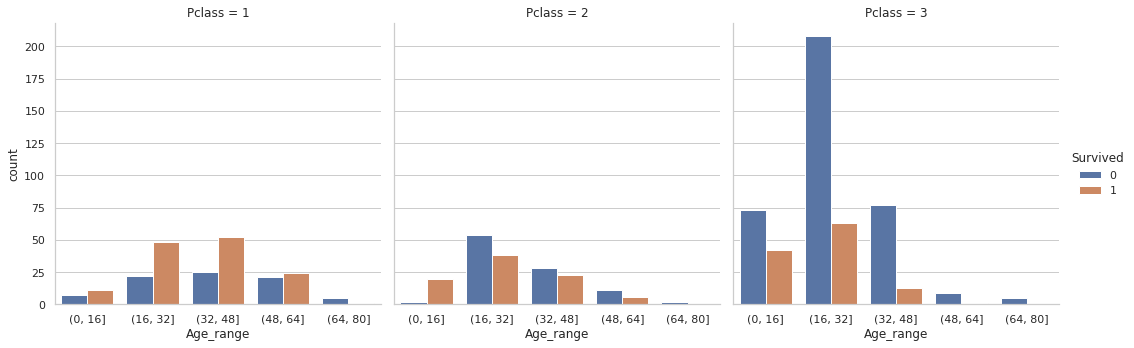

In [39]:
plt.figure(figsize=(14,7))
sns.catplot(x ='Age_range', hue ='Survived',
kind ='count', col ='Pclass', data = train_df)

plt.show()

**Creating a new feature from Name**

In [40]:
data = [train_df,test_df]
for dataset in data:
    dataset['Title'] = dataset.Name.apply(lambda x: x.split(',')[1]
                                                            .split('.')[0].strip())
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

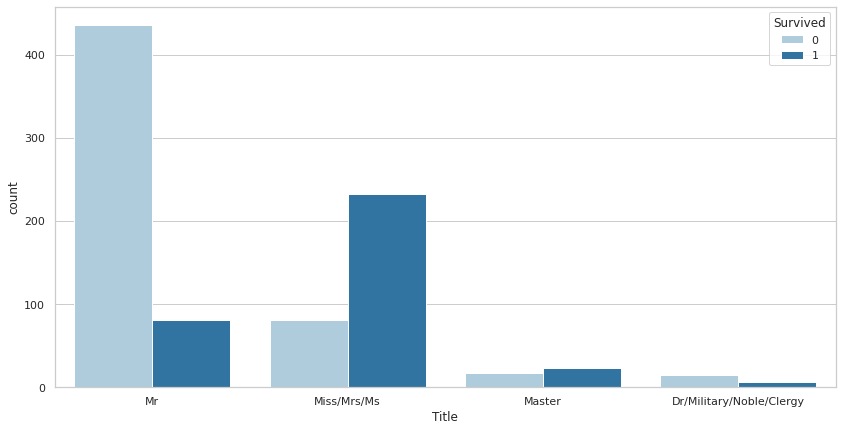

In [41]:
plt.figure(figsize=(14,7))
data = [train_df,test_df]
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.countplot(x = 'Title',data = train_df, hue = 'Survived',palette = "Paired")
plt.show()

**Converting the features**

In [42]:
data = [train_df,test_df]
title_map = list(train_df['Title'].unique())
dic = {title_map[i]:i for i in range(len(title_map))}
for dataset in data:
    dataset['Title']= dataset['Title'].map(dic)
    
train_df.Title.unique()    

array([0, 1, 2, 3])

In [43]:
age_range = list(train_df['Age_range'].unique())
age_range.sort()
dic = {age_range[i]:i for i in range(len(age_range))}
data = [train_df,test_df]
for dataset in data:
    dataset['Age_range'] = dataset["Age_range"].map(dic)
    
train_df['Age_range'].head(10)    

0    1
1    2
2    1
3    2
4    2
5    1
6    3
7    0
8    1
9    0
Name: Age_range, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [44]:
embarked = list(train_df['Embarked'].unique())
embarked.sort()
dic = {embarked[i]:i for i in range(len(embarked))}
data = [train_df,test_df]
for dataset in data:
    dataset['Embarked'] = dataset["Embarked"].map(dic)
train_df['Embarked'].unique()

array([2, 0, 1])

In [45]:
fare_range = list(train_df['Fare_range'].unique())
dic = {fare_range[i]:i for i in range(len(fare_range))}
data = [train_df,test_df]
for dataset in data:
    dataset['Fare_range'] = dataset['Fare_range'].map(dic)

In [46]:
sex_map = {"male": 0,"female": 1}
data = [train_df,test_df]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(sex_map)
        

In [47]:
family_size=train_df['Family_size'].unique()
family_map = {'Alone':0,'Large':1,'Medium':2,'Small':3}
data = [train_df,test_df]
for dataset in data:
    dataset['Family_size']= dataset['Family_size'].map(family_map) 

**Creating a new feature from Age and Pclass column**

In [48]:
data = [train_df,test_df]
for dataset in data:
    ra = list(dataset['Age_range'].unique())
    pc = list(dataset['Pclass'].unique())
    d= 0 
    for i in range(len(pc)):
        c = 0
        for j in range(len(ra)):
            dataset.loc[(dataset['Age_range']==ra[j]) & (dataset['Pclass']==pc[i]),'Age_class'] = c + d
            c += 1
        d += 5  
        
    dataset['Age_class'] = dataset['Age_class'].astype(int)        

**Ticket and Cabin**

In [49]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [50]:
train_df['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

Since cabin has lots of missing values and ticket has many unique values so dropping these two column.

In [51]:
train_df=train_df.drop(['Cabin','Ticket'],axis = 1)
test_df=test_df.drop(['Cabin','Ticket'],axis = 1)

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    int64   
 10  Age_range    891 non-null    category
 11  relatives    891 non-null    int64   
 12  Alone        891 non-null    int64   
 13  Family_size  891 non-null    int64   
 14  Fare_range   891 non-null    category
 15  Title        891 non-null    int64   
 16  Age_class    891 non-null    int64   
dtypes: category(2), float64(2), int64(12), object(1)
memory usage: 106.7+ KB


In [53]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    int64   
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Fare         418 non-null    float64 
 8   Embarked     418 non-null    int64   
 9   Age_range    418 non-null    category
 10  relatives    418 non-null    int64   
 11  Alone        418 non-null    int64   
 12  Family_size  418 non-null    int64   
 13  Fare_range   418 non-null    category
 14  Title        418 non-null    int64   
 15  Age_class    418 non-null    int64   
dtypes: category(2), float64(2), int64(11), object(1)
memory usage: 47.1+ KB


# Model Development

In [54]:
test_pass_id = test_df['PassengerId'].copy()
drop_cols = ['PassengerId','Name','Age','Fare']
data = [train_df,test_df]
for dataset in data:
    dataset.drop(columns=drop_cols, inplace=True)
train_df.head(10)   

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_range,relatives,Alone,Family_size,Fare_range,Title,Age_class
0,0,3,0,1,0,2,1,1,1,3,0,0,0
1,1,1,1,1,0,0,2,1,1,3,1,1,6
2,1,3,1,0,0,2,1,0,0,0,0,1,0
3,1,1,1,1,0,2,2,1,1,3,1,1,6
4,0,3,0,0,0,2,2,0,0,0,2,0,1
5,0,3,0,0,0,1,1,0,0,0,2,0,0
6,0,1,0,0,0,2,3,0,0,0,1,0,7
7,0,3,0,3,1,2,0,4,1,2,3,2,3
8,1,3,1,0,2,2,1,2,1,3,3,1,0
9,1,2,1,1,0,0,0,1,1,3,4,1,13


In [55]:
test_df.head(10)

,Pclass,Sex,SibSp,Parch,Embarked,Age_range,relatives,Alone,Family_size,Fare_range,Title,Age_class
0,3,0,0,0,1,2,0,0,0,0,0,0
1,3,1,1,0,2,2,1,1,3,0,1,0
2,2,0,0,0,1,3,0,0,0,2,0,6
3,3,0,0,0,2,1,0,0,0,2,0,2
4,3,1,1,1,2,1,2,1,3,3,1,2
5,3,0,0,0,2,0,0,0,0,2,0,3
6,3,1,0,0,1,1,0,0,0,0,1,2
7,2,0,1,1,2,1,2,1,3,4,0,7
8,3,1,0,0,0,1,0,0,0,0,1,2
9,3,0,2,0,2,1,2,1,3,4,0,2


In [56]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df

**Random Forest**

In [57]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
score_random_forest = round(random_forest.score(X_train, Y_train), 3)

**Logistic Regression**

In [58]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

score_log = round(logreg.score(X_train, Y_train),3)

**KNN**

In [59]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
score_knn = round(knn.score(X_train, Y_train), 3)

**Linear Support Vector Machine**

In [60]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
score_linear_svc = round(linear_svc.score(X_train, Y_train), 3)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Decision Tree**

In [61]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
score_decision_tree = round(decision_tree.score(X_train, Y_train), 3)

In [62]:
scores = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score': [ score_knn, score_log, score_random_forest, score_decision_tree]})

scores

,Model,Score
0,KNN,0.862
1,Logistic Regression,0.809
2,Random Forest,0.891
3,Decision Tree,0.891


In [63]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.85393258 0.74157303 0.79775281 0.85393258 0.83146067
 0.84269663 0.75280899 0.84269663 0.84269663]
Mean: 0.813732833957553
Standard Deviation: 0.040656979011571254


In [64]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances

,importance
feature,
Title,0.221
Sex,0.196
Age_class,0.121
Fare_range,0.106
Pclass,0.080
Embarked,0.058
Age_range,0.054
relatives,0.053
Family_size,0.039


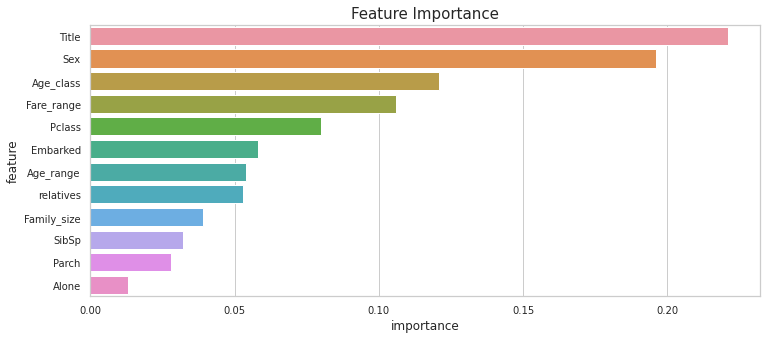

In [65]:
plt.figure(figsize=(12, 5))
sns.barplot(x='importance', y=importances.index, data=importances)

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Feature Importance', size=15)

plt.show()

Dropping the Alone feature.

In [66]:
train_df  = train_df.drop("Alone", axis=1)
test_df  = test_df.drop("Alone", axis=1)


In [67]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")


oob score: 82.04 %


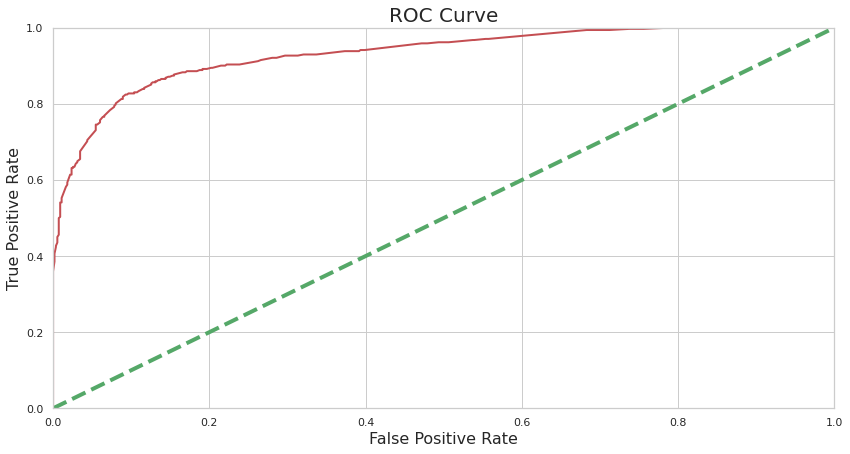

In [68]:
from sklearn.metrics import roc_curve
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr,'r', linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'g', linewidth=4,linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve', fontsize = 20)

plt.figure(figsize=(14, 7))
plot_roc_curve(fpr, tpr)
plt.show()

In [69]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.931331820747984


Since ROC-AUC score is very good so I choos random forest for my model.

In [70]:

pred_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
pred_df['PassengerId'] = test_pass_id
pred_df['Survived']= Y_prediction
pred_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [71]:
pred_df.to_csv('submission.csv',header = True,index=False)